# Import necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score,roc_curve

# Read Data

In [3]:
brain_stroke_data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
brain_stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Remove unnecessary column(s)

In [5]:
brain_stroke_data=brain_stroke_data.drop(columns=['id'])

# Check for nulls

In [6]:
brain_stroke_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Handle nulls

In [7]:
brain_stroke_data['bmi']=brain_stroke_data['bmi'].fillna(brain_stroke_data['bmi'].mean())

# Encode categorial variables

In [8]:
labelencoder=LabelEncoder()
brain_stroke_data['gender']=labelencoder.fit_transform(brain_stroke_data['gender'])
brain_stroke_data['ever_married']=labelencoder.fit_transform(brain_stroke_data['ever_married'])
brain_stroke_data['work_type']=labelencoder.fit_transform(brain_stroke_data['work_type'])
brain_stroke_data['Residence_type']=labelencoder.fit_transform(brain_stroke_data['Residence_type'])
brain_stroke_data['smoking_status']=labelencoder.fit_transform(brain_stroke_data['smoking_status'])

# Exploratory Data Analysis (EDA)

## correlation heatmap

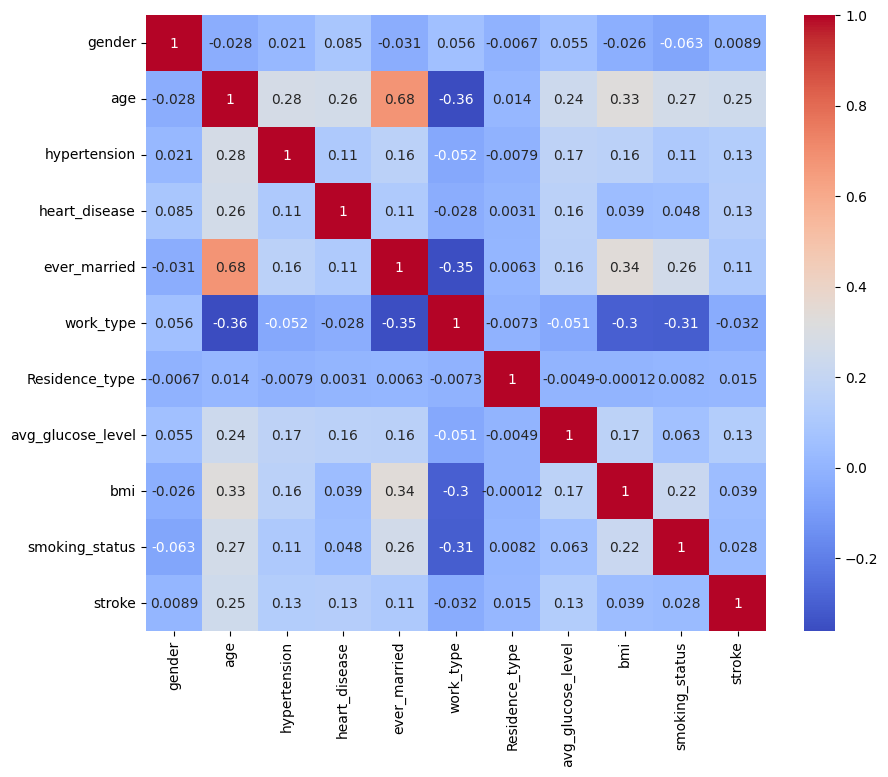

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(brain_stroke_data.corr(),annot=True,cmap='coolwarm')
plt.show()

## Distribution of features

### Age

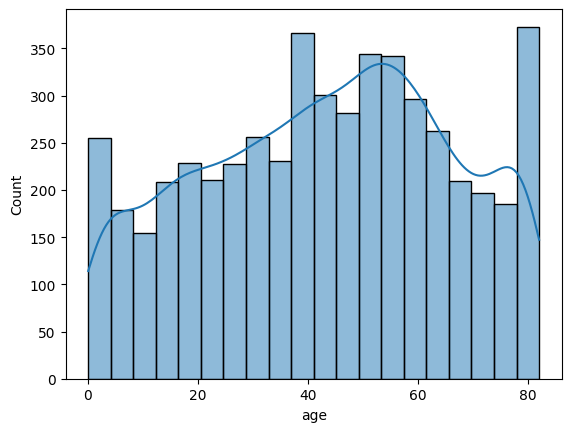

In [10]:
sns.histplot(brain_stroke_data['age'],kde=True)
plt.show()

### Average glucose level

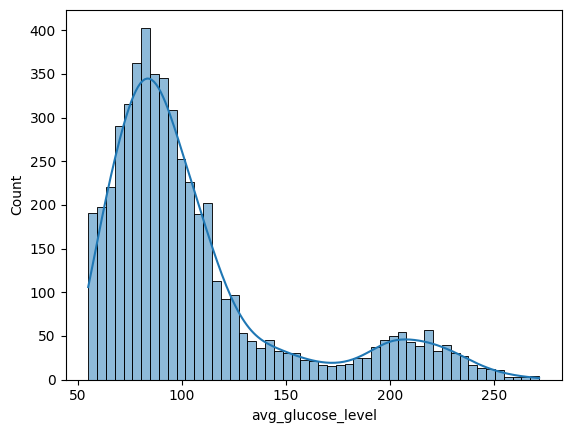

In [11]:
sns.histplot(brain_stroke_data['avg_glucose_level'],kde=True)
plt.show()

### BMI

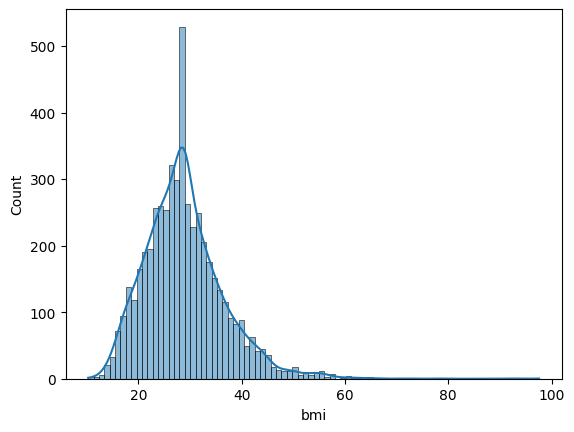

In [12]:
sns.histplot(brain_stroke_data['bmi'],kde=True)
plt.show()

# Normalize continous variables

In [13]:
scaler=StandardScaler()
brain_stroke_data[['age','avg_glucose_level','bmi']]=scaler.fit_transform(brain_stroke_data[['age','avg_glucose_level','bmi']])

# Define features and target

In [14]:
x=brain_stroke_data.drop(columns=['stroke'])
y=brain_stroke_data['stroke']

# Test train split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Train Model and measue metrics

## Recursive Feature Elimination (RFE) with Random Forest

In [16]:
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=5)
x_train_train_rfe = rfe.fit_transform(x_train, y_train)
x_test_rfe = rfe.transform(x_test)

## Logistic Regression

In [17]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9393346379647749
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

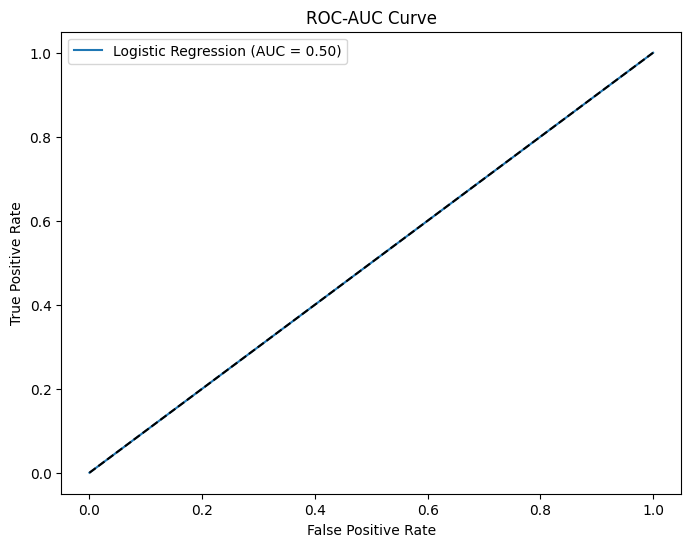

In [18]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()

## Random Forest Classifier

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9383561643835616
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



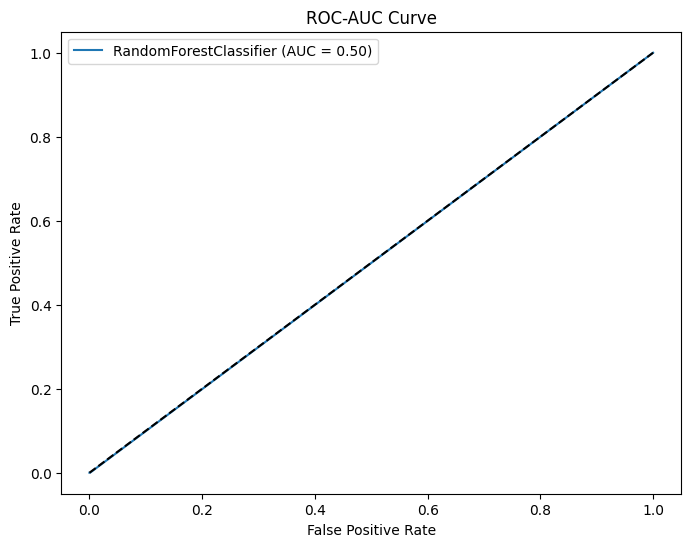

In [20]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'RandomForestClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()

## Decision Tree Classifier

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.910958904109589
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.20      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022



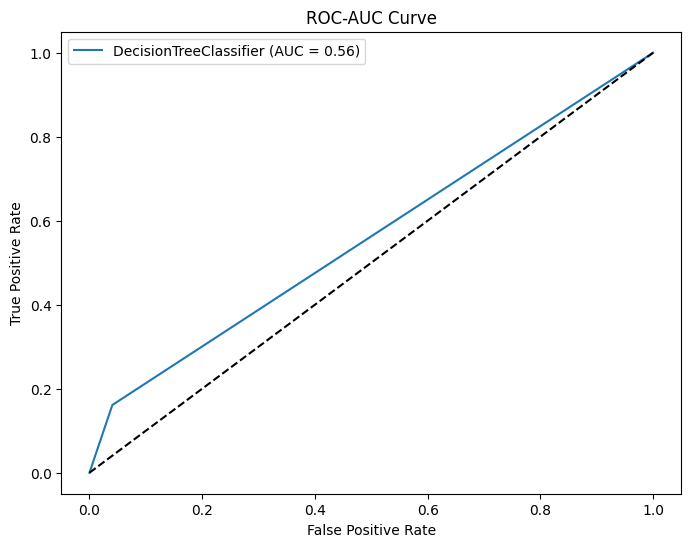

In [22]:
roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'DecisionTreeClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()

## GaussianNB

In [23]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report for GaussianNB:\n", classification_report(y_test, y_pred_gnb))


GaussianNB Accuracy: 0.8669275929549902
Classification Report for GaussianNB:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       960
           1       0.22      0.47      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.92      0.87      0.89      1022



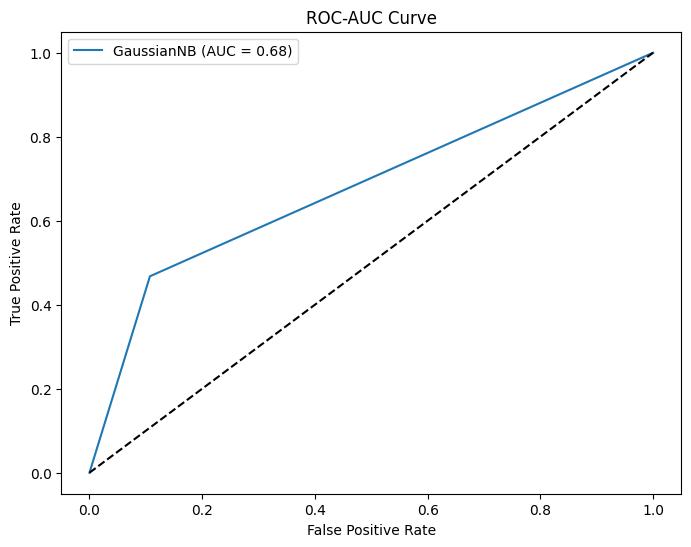

In [24]:
roc_auc = roc_auc_score(y_test, y_pred_gnb)
fpr, tpr, _ = roc_curve(y_test, y_pred_gnb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'GaussianNB (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()

## XGBoost Classifier

In [25]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9393346379647749
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.50      0.10      0.16        62

    accuracy                           0.94      1022
   macro avg       0.72      0.55      0.57      1022
weighted avg       0.92      0.94      0.92      1022



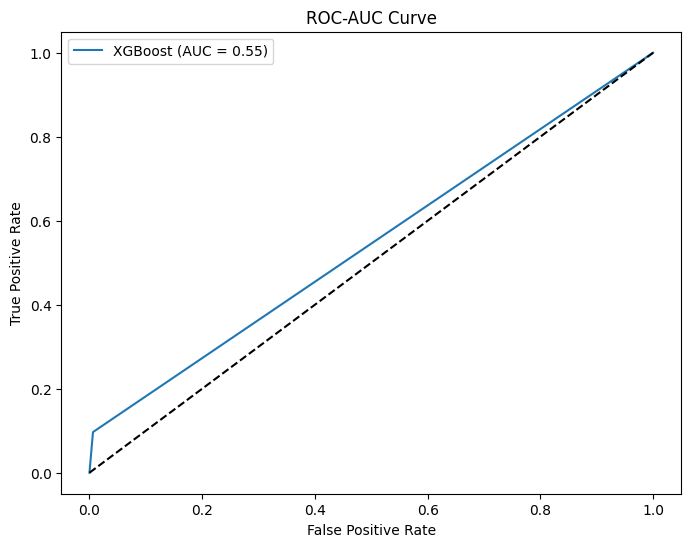

In [26]:
roc_auc = roc_auc_score(y_test, y_pred_xgb)
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()

## SVC

In [27]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report for SVC:\n", classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.9393346379647749
Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaustubha Ram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

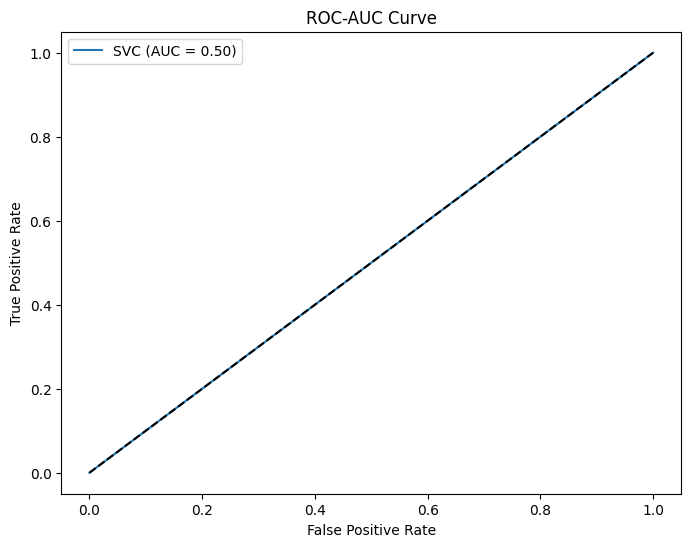

In [28]:
roc_auc = roc_auc_score(y_test, y_pred_svc)
fpr, tpr, _ = roc_curve(y_test, y_pred_svc)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'SVC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()

## Hyperparameter Tuning for Random Forest

In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Optimized Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Random Forest Accuracy: 0.9383561643835616
Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

